In [82]:
# !python tests/test_core.py

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# tex = np.load("../deepdrr/self.mesh_hit_alphas_tex_gpu.npy")
# tex = tex.reshape((32, 200, 300, 2))
# tex.shape

In [4]:
# actual = np.load("../deepdrr/self.additive_densities_gpu.npy")
# print(actual.shape)
# print(actual.dtype)
# actual = actual.reshape(-1, 400, 400, 2)
# print(actual.shape)
# # actual[actual == np.inf] = np.nan

# def plot_channel(i):
#     plt.figure(figsize=(5, 3))
#     plt.imshow(actual[i, :, :, 0])
#     plt.title(f"expected {i} min: {np.nanmin(actual[:, :, i]):.2f} max: {np.nanmax(actual[:, :, i]):.2f}")
#     plt.colorbar()
#     # plt.show()
#     plt.savefig(f"expected_{i}.png")
    

# for i in range(4):
# # for i in range(actual.shape[2]):
#     plot_channel(i)


In [5]:
# actual = np.load("../deepdrr/self.mesh_hit_alphas_tex_gpu.npy")
# print(actual.shape)
# print(actual.dtype)
# actual = actual.reshape(-1, 400, 400, 2)
# print(actual.shape)
# # actual[actual == np.inf] = np.nan

# def plot_channel(i, arr):
#     plt.figure(figsize=(5, 3))
#     plt.imshow(arr)
#     plt.title(f"expected {i} min: {np.nanmin(arr):.2f} max: {np.nanmax(arr):.2f}")
#     plt.colorbar()
#     plt.show()
    
# a = actual[0, :, :, 0]
# b = actual[0, :, :, 1]

# # assert that all inf values are in the same place
# assert np.all(np.isinf(a) == np.isinf(b))
# # assert that all non-inf values in a are less than the corresponding values in b
# assert np.all(np.where(np.isinf(a), True, a < b))


# # plot_channel(0, a)
# # plot_channel(1, b)

# # # subtract a from b and plot
# # plot_channel(2, b - a)



# for i in range(8):
# # for i in range(actual.shape[2]):
#     plot_channel(i, actual[i//2, :, :, i%2])


(160000, 32)
float32
(1, 400, 400, 32)


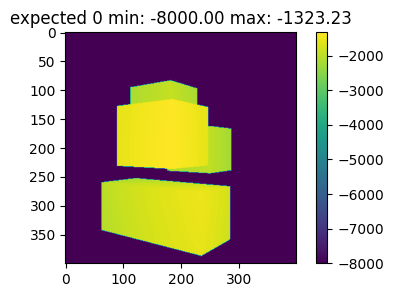

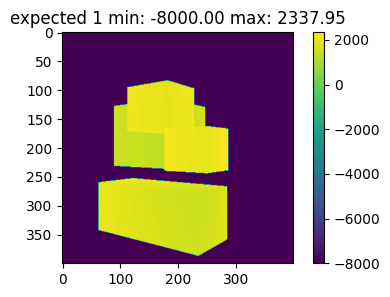

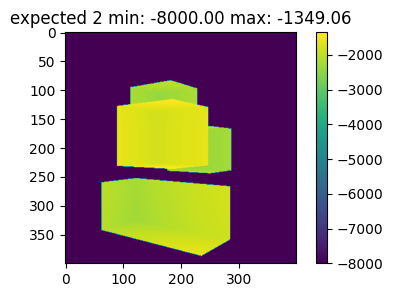

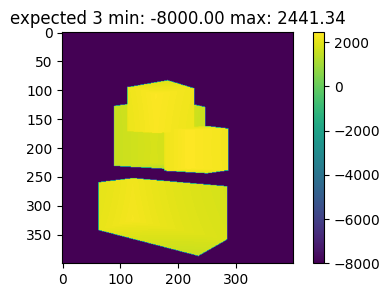

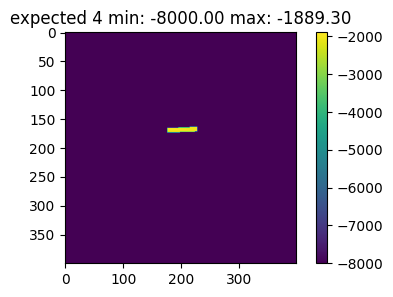

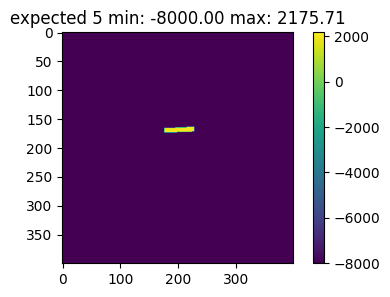

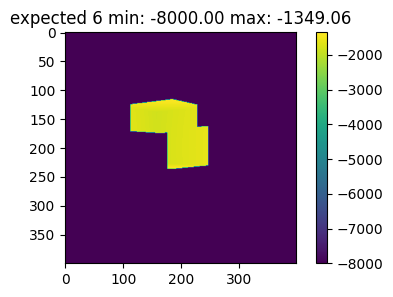

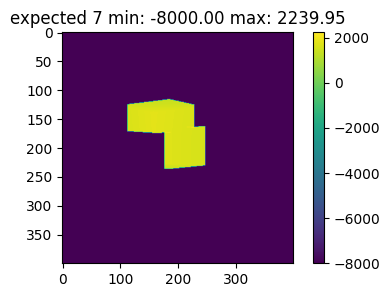

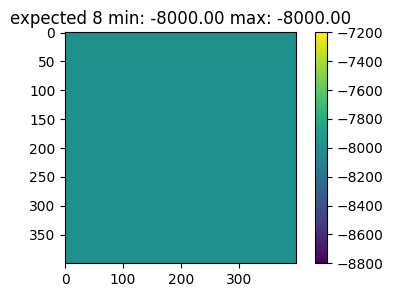

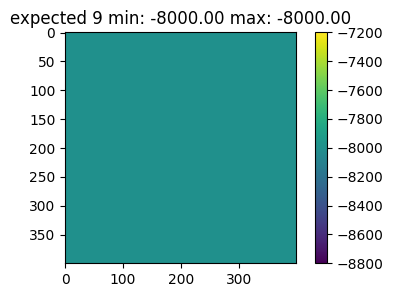

In [96]:
actual = np.load("../deepdrr/self.mesh_hit_alphas_gpu_0.npy")
# actual = np.load("../deepdrr/self.mesh_hit_alphas_tex_gpu.npy")
print(actual.shape)
print(actual.dtype)
actual = actual.reshape(-1, 400, 400, 32)
# actual = actual.reshape(-1, 400, 400, 2)
print(actual.shape)
# actual[actual == np.inf] = np.nan

def plot_channel(i, arr):
    plt.figure(figsize=(5, 3))
    plt.imshow(arr)
    plt.title(f"expected {i} min: {np.nanmin(arr):.2f} max: {np.nanmax(arr):.2f}")
    plt.colorbar()
    plt.show()
    

for i in range(10):
# for i in range(actual.shape[2]):
    plot_channel(i, actual[0, :, :, i])


(160000, 32)
float32
(1, 400, 400, 32)


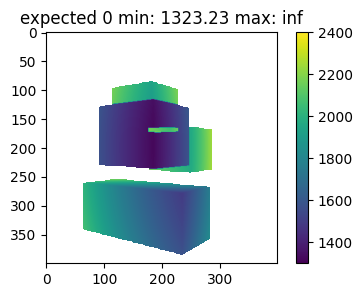

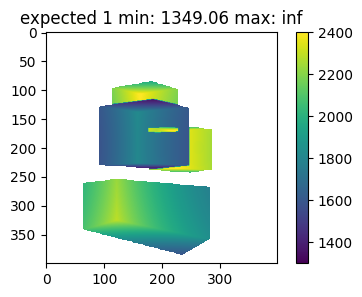

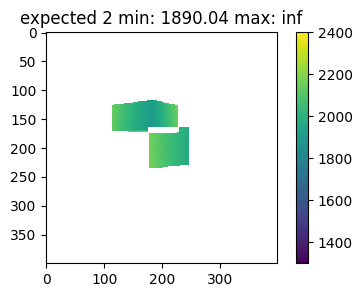

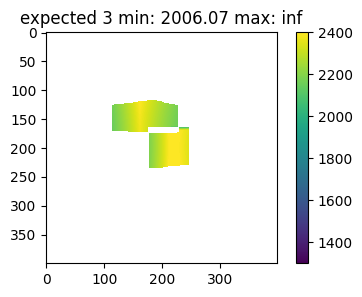

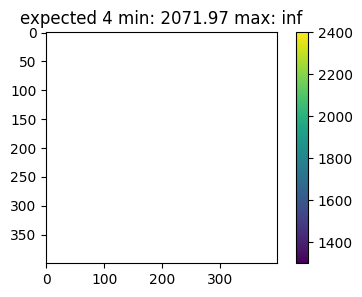

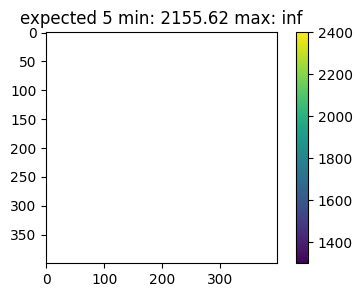

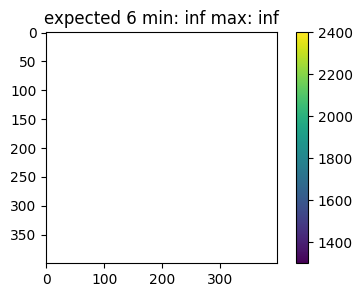

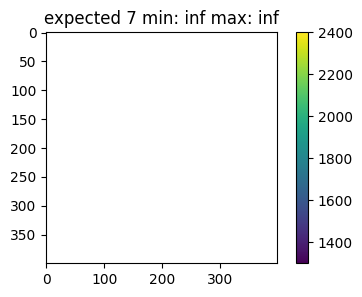

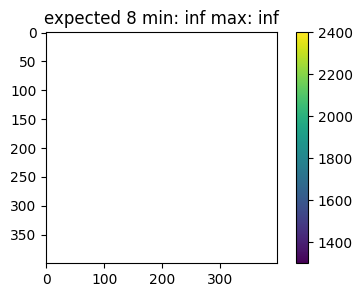

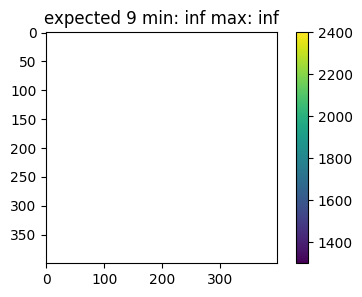

In [116]:
actual = np.load("../deepdrr/self.mesh_hit_alphas_gpu_1.npy")
# actual = np.load("../deepdrr/self.mesh_hit_alphas_tex_gpu.npy")
print(actual.shape)
print(actual.dtype)
actual = actual.reshape(-1, 400, 400, 32)
# actual = actual.reshape(-1, 400, 400, 2)
print(actual.shape)
# actual[actual == np.inf] = np.nan

vmin = 1300
vmax = 2400

def plot_channel(i, arr):
    plt.figure(figsize=(5, 3))
    plt.imshow(arr, vmin=vmin, vmax=vmax)
    plt.title(f"expected {i} min: {np.nanmin(arr):.2f} max: {np.nanmax(arr):.2f}")
    plt.colorbar()
    plt.show()
    

for i in range(10):
# for i in range(actual.shape[2]):
    plot_channel(i, actual[0, :, :, i])


(160000, 32)
float32
(1, 400, 400, 32)


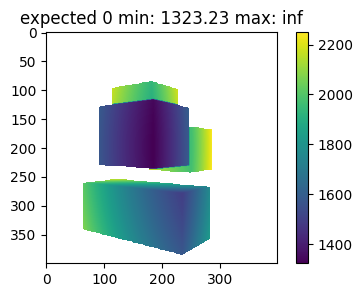

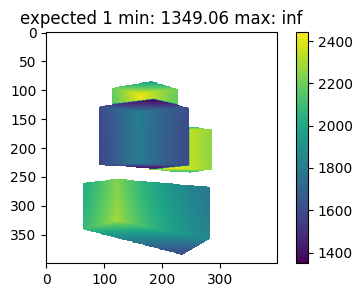

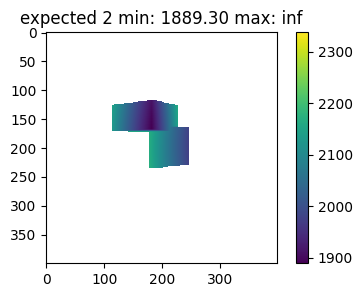

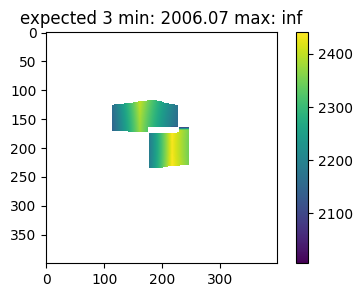

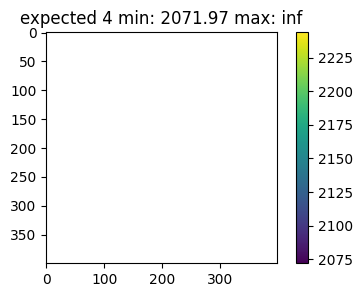

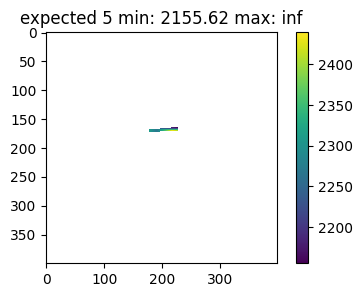

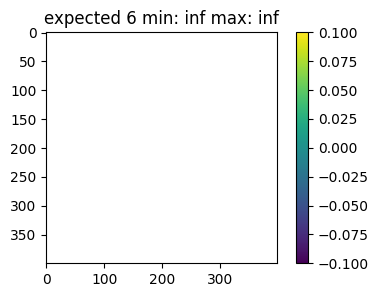

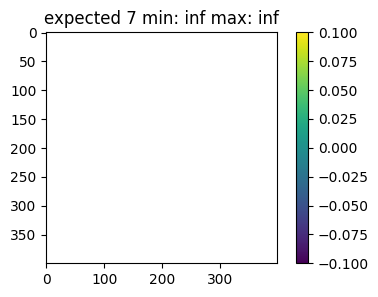

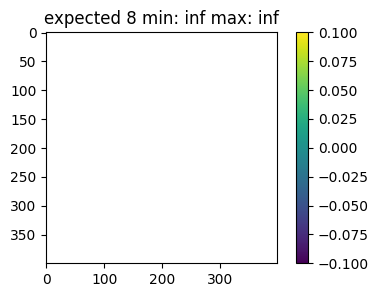

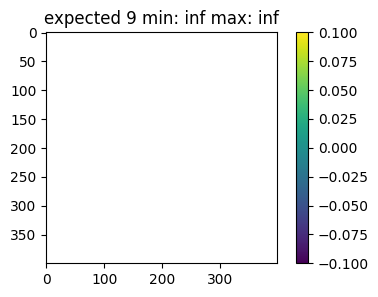

In [6]:
actual = np.load("../deepdrr/self.mesh_hit_alphas_gpu_1.npy")
# actual = np.load("../deepdrr/self.mesh_hit_alphas_tex_gpu.npy")
print(actual.shape)
print(actual.dtype)
actual = actual.reshape(-1, 400, 400, 32)
# actual = actual.reshape(-1, 400, 400, 2)
print(actual.shape)
# actual[actual == np.inf] = np.nan

# vmin = 1300
# vmax = 2400

vmin = None
vmax = None

def plot_channel(i, arr):
    plt.figure(figsize=(5, 3))
    plt.imshow(arr, vmin=vmin, vmax=vmax)
    plt.title(f"expected {i} min: {np.nanmin(arr):.2f} max: {np.nanmax(arr):.2f}")
    plt.colorbar()
    plt.show()
    

for i in range(10):
# for i in range(actual.shape[2]):
    plot_channel(i, actual[0, :, :, i])


(160000, 32)
float32
(1, 400, 400, 32)


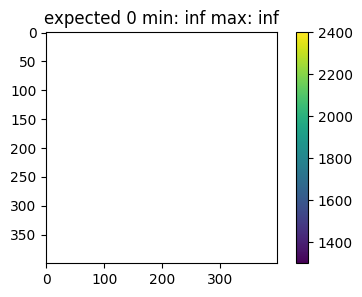

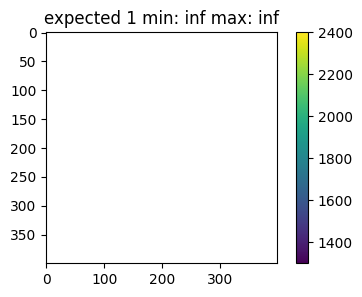

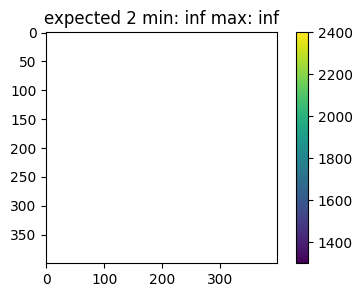

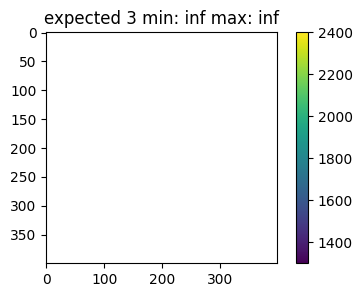

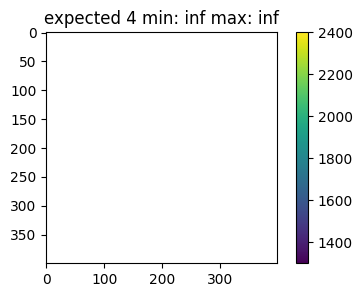

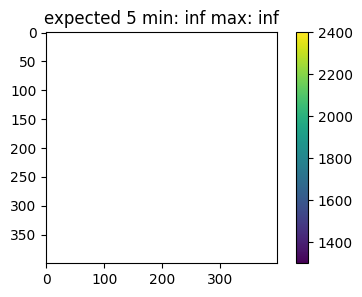

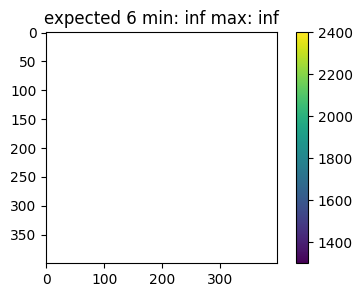

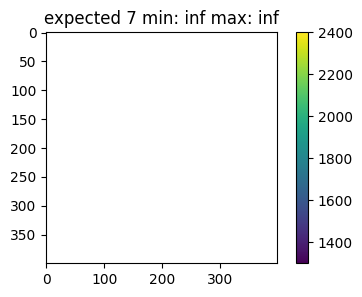

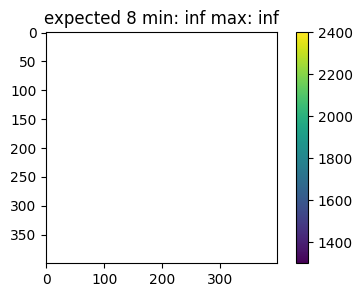

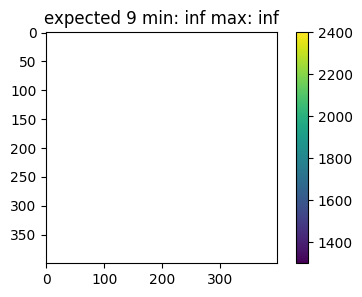

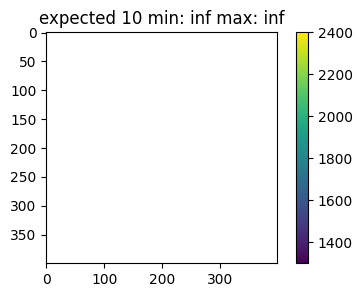

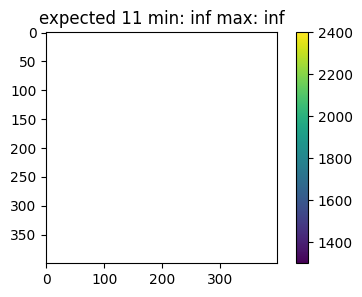

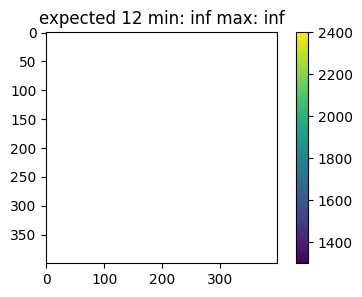

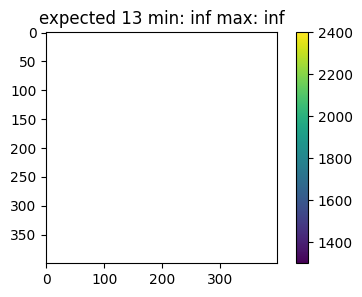

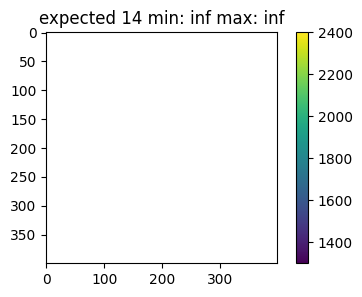

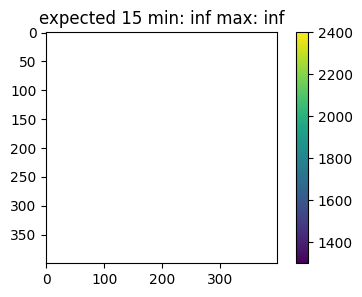

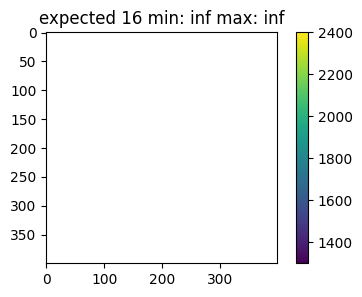

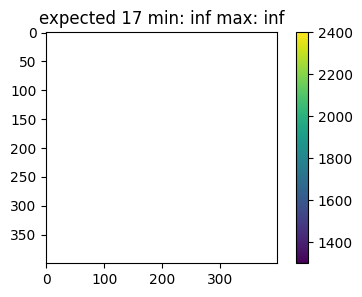

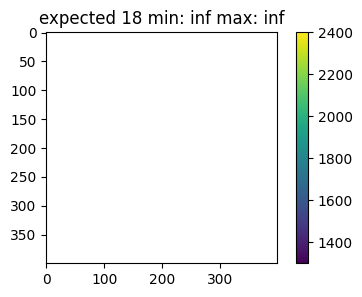

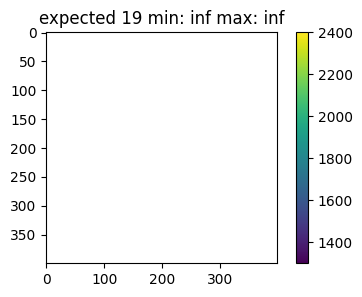

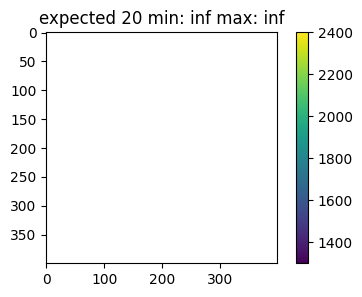

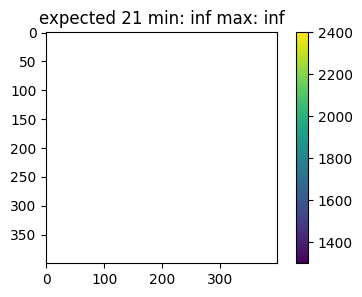

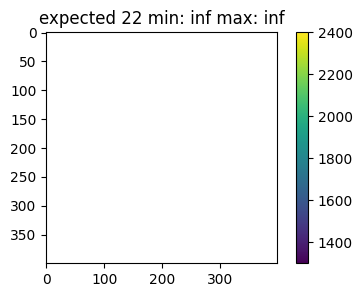

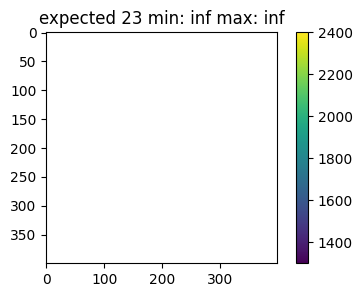

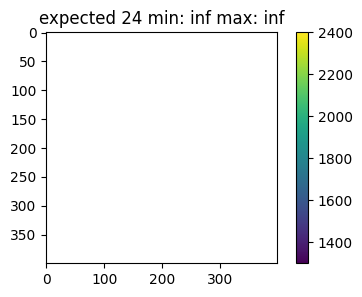

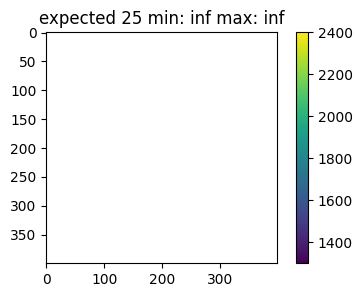

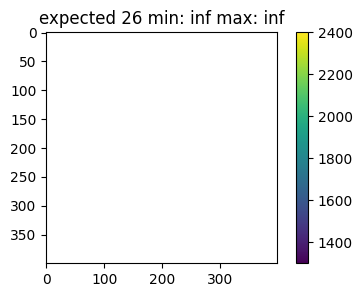

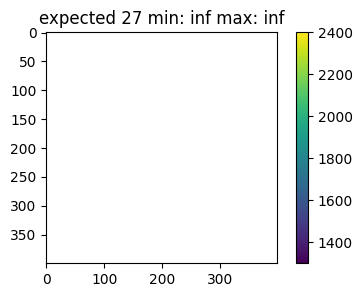

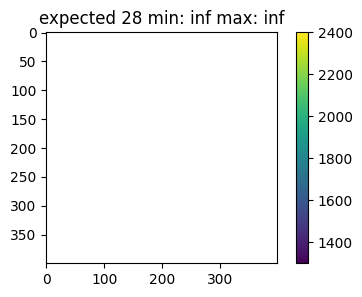

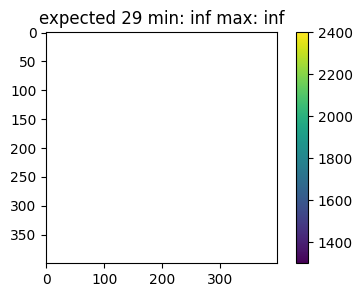

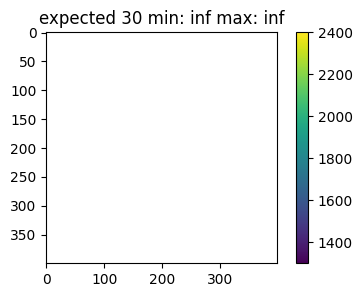

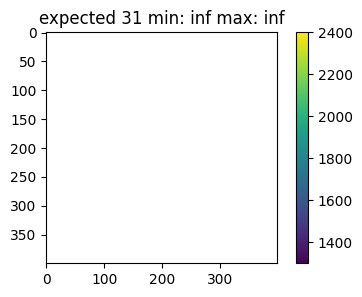

IndexError: index 32 is out of bounds for axis 3 with size 32

In [137]:
actual = np.load("../deepdrr/self.mesh_hit_alphas_gpu_1.npy")
# actual = np.load("../deepdrr/self.mesh_hit_alphas_tex_gpu.npy")
print(actual.shape)
print(actual.dtype)
actual = actual.reshape(-1, 400, 400, 32)
# actual = actual.reshape(-1, 400, 400, 2)
print(actual.shape)
# actual[actual == np.inf] = np.nan

vmin = 1300
vmax = 2400

def plot_channel(i, arr):
    plt.figure(figsize=(5, 3))
    plt.imshow(arr, vmin=vmin, vmax=vmax)
    plt.title(f"expected {i} min: {np.nanmin(arr):.2f} max: {np.nanmax(arr):.2f}")
    plt.colorbar()
    plt.show()
    

# for i in range(10):
for i in range(actual.shape[2]):
    plot_channel(i, actual[0, :, :, i])


(2560000, 32)
float32


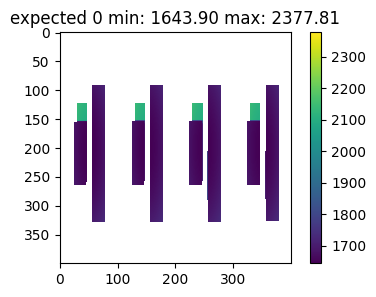

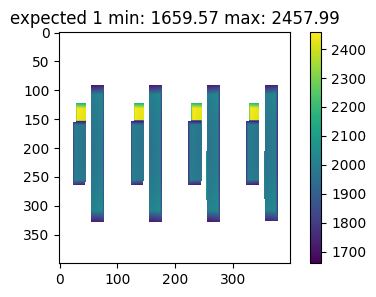

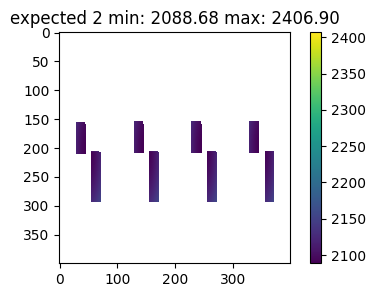

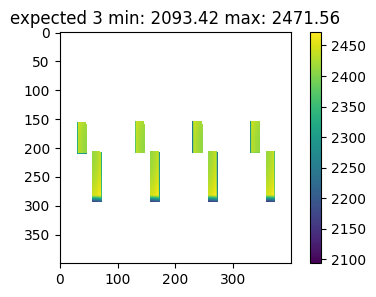

/tmp/ipykernel_48837/2408112982.py:10: RuntimeWarning: All-NaN slice encountered
  plt.title(f"expected {i} min: {np.nanmin(actual[:, :, i]):.2f} max: {np.nanmax(actual[:, :, i]):.2f}")


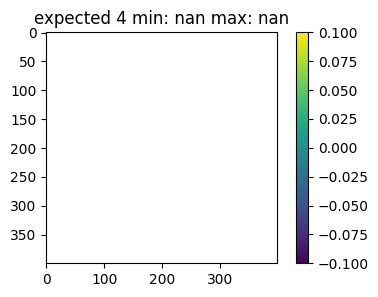

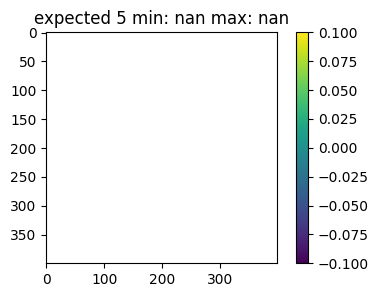

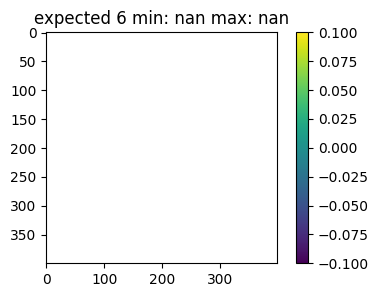

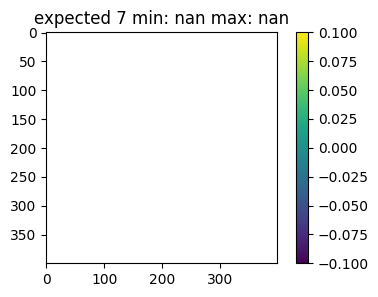

In [62]:
actual = np.load("../deepdrr/self.mesh_hit_alphas_gpu.npy")
print(actual.shape)
print(actual.dtype)
actual = actual.reshape(400, 400, -1)
actual[actual == np.inf] = np.nan

def plot_channel(i):
    plt.figure(figsize=(5, 3))
    plt.imshow(actual[:, :, i])
    plt.title(f"expected {i} min: {np.nanmin(actual[:, :, i]):.2f} max: {np.nanmax(actual[:, :, i]):.2f}")
    plt.colorbar()
    plt.show()
    

for i in range(8):
# for i in range(actual.shape[2]):
    plot_channel(i)


In [15]:
# # show tex im
# show  = tex[2, :, :, 0]
# plt.imshow(show)
# print(f"mean: {np.mean(show)} max: {np.max(show)} min: {np.min(show)}")


In [16]:
expected = np.load("../deepdrr-ref/self.mesh_hit_alphas_gpu.npy")
actual = np.load("../deepdrr/self.mesh_hit_alphas_gpu.npy")
# shapes
print(expected.shape)
print(actual.shape)
# dtypes
print(expected.dtype)
print(actual.dtype)
# reshape to 200*300*-1
# expected = expected.reshape(400*4, 400*4, -1)
# actual = actual.reshape(400*4, 400*4, -1)
expected = expected.reshape(200*300, -1)
actual = actual.reshape(200*300, -1)
# find = np.min(expected)
# expected[expected == find] = np.nan
# expected[:, :, 0::2] = -expected[:, :, 0::2]
# set inf to nan
expected[expected == np.inf] = np.nan
# find = np.max(actual)
# actual[actual == find] = np.nan
# find = 0.0001
# actual[actual <= find] = np.nan
# set inf to nan
actual[actual == np.inf] = np.nan

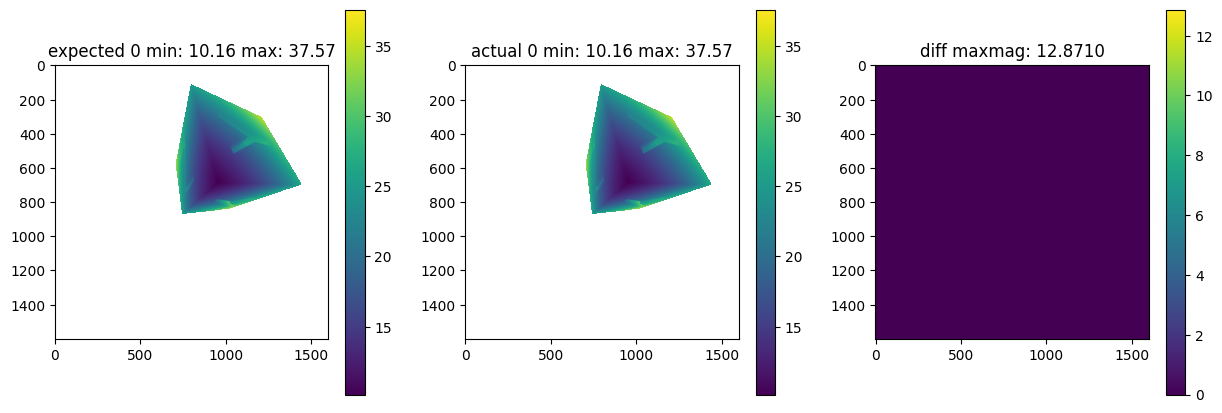

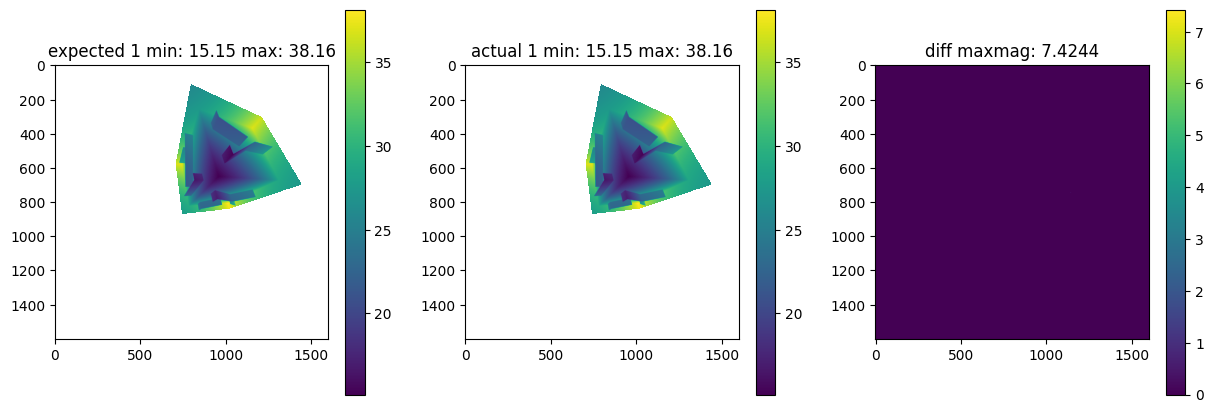

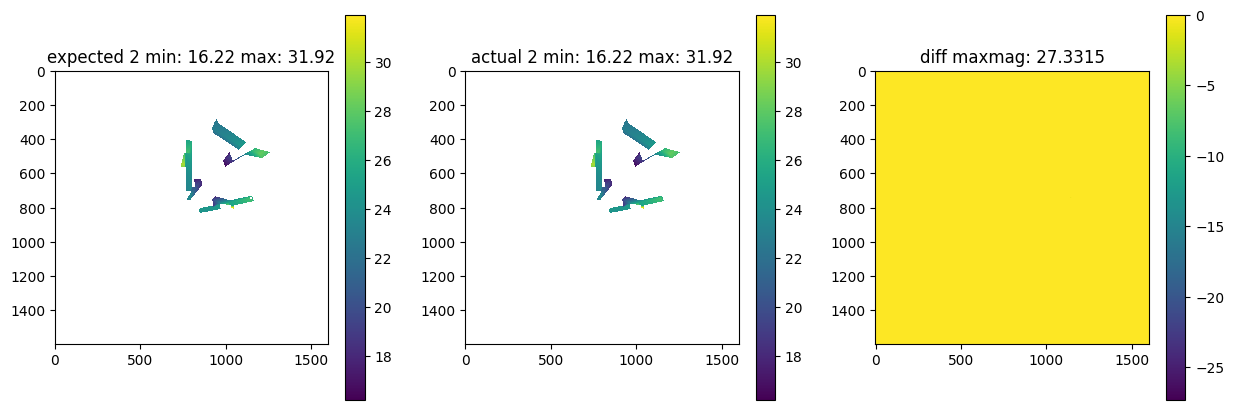

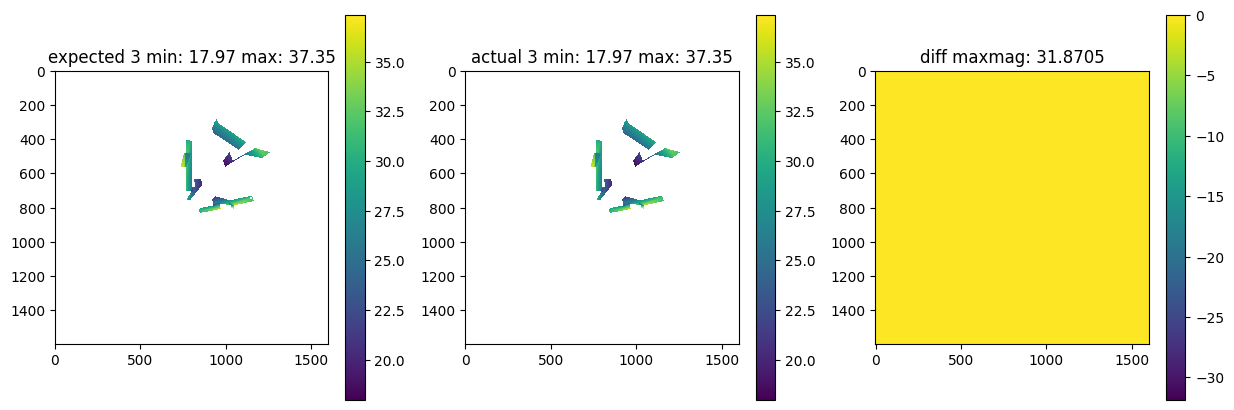

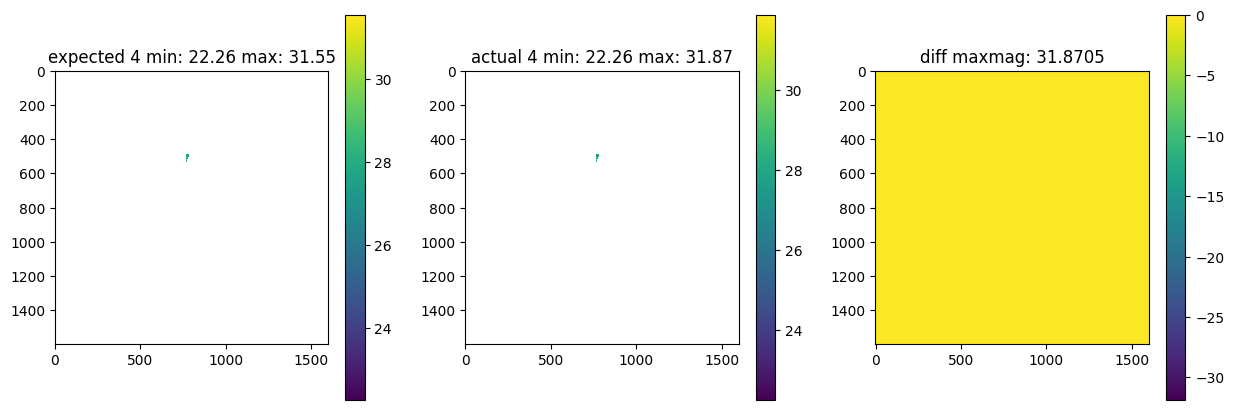

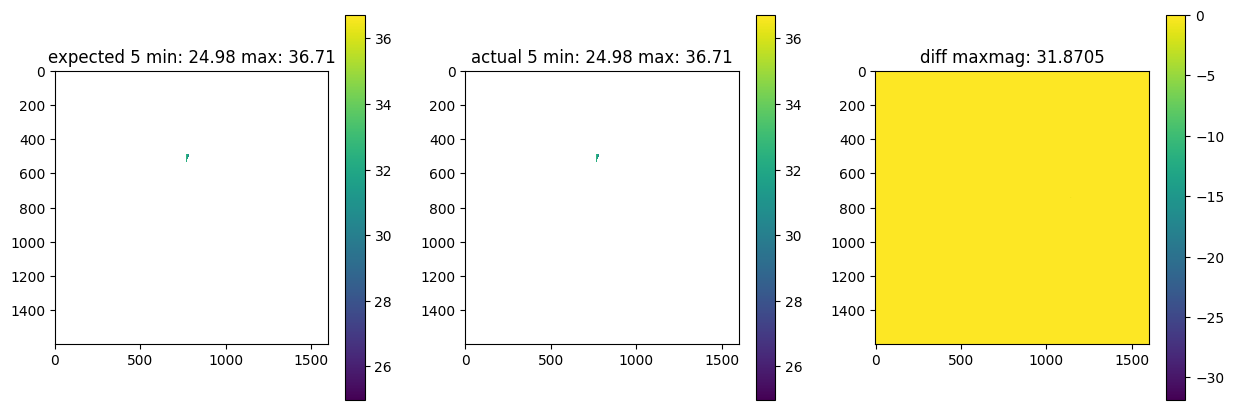

/tmp/ipykernel_48837/1288416476.py:3: RuntimeWarning: All-NaN slice encountered
  axs[0].set_title(f"expected {i} min: {np.nanmin(expected[:, :, i]):.2f} max: {np.nanmax(expected[:, :, i]):.2f}")
/tmp/ipykernel_48837/1288416476.py:5: RuntimeWarning: All-NaN slice encountered
  axs[1].set_title(f"actual {i} min: {np.nanmin(actual[:, :, i]):.2f} max: {np.nanmax(actual[:, :, i]):.2f}")


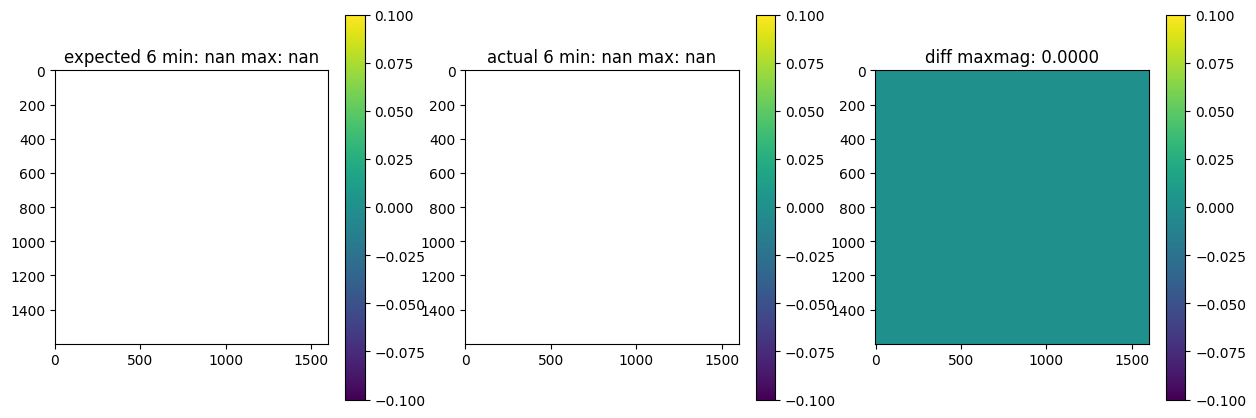

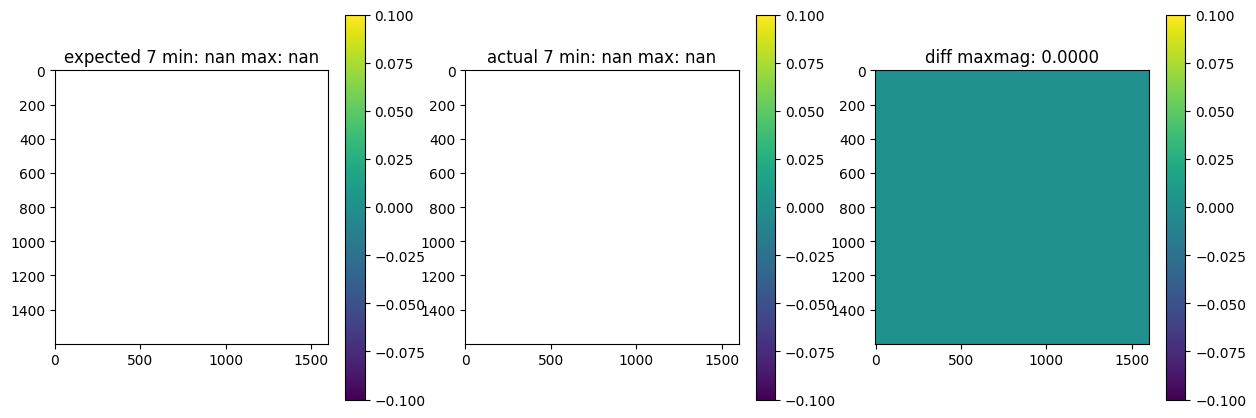

In [ ]:
def plot_channel(i):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].set_title(f"expected {i} min: {np.nanmin(expected[:, :, i]):.2f} max: {np.nanmax(expected[:, :, i]):.2f}")
    axs[0].imshow(expected[:, :, i])
    axs[1].set_title(f"actual {i} min: {np.nanmin(actual[:, :, i]):.2f} max: {np.nanmax(actual[:, :, i]):.2f}")
    axs[1].imshow(actual[:, :, i])
    expected_no_nan = np.copy(expected[:, :, i])
    expected_no_nan[np.isnan(expected_no_nan)] = 0
    expected_no_nan[expected_no_nan == np.inf] = 0

    actual_no_nan = np.copy(actual[:, :, i])
    actual_no_nan[np.isnan(actual_no_nan)] = 0
    actual_no_nan[actual_no_nan == np.inf] = 0

    # axs[2].imshow(expected[:, :, i] - actual[:, :, i])
    diff = expected_no_nan - actual_no_nan
    axs[2].imshow(diff)
    axs[2].set_title(f"diff maxmag: {np.max(np.abs(diff)):.4f}")

    # colorbars
    fig.colorbar(axs[0].imshow(expected[:, :, i]), ax=axs[0])
    fig.colorbar(axs[1].imshow(actual[:, :, i]), ax=axs[1])
    fig.colorbar(axs[2].imshow(diff), ax=axs[2])
    plt.show()
    

for i in range(8):
# for i in range(expected.shape[2]):
    plot_channel(i)
